In [1]:
# Prepare envs
##  Libs
import sys
proj_path_str='..'
sys.path.append(proj_path_str)
from pathlib import Path
import pandas as pd
import numpy as np
import seaborn as sns

## set up Fonts for vis
import matplotlib.pyplot as plt
plt.rcParams['font.serif'] = 'Times New Roman' #Times New Roman
plt.rcParams['font.family'] = 'DeJavu Serif' #DeJavu Serif 	 [ 'serif' | 'sans-serif' | 'cursive' | 'fantasy' | 'monospace' ]
#matplotlib.rcParams['font.sans-serif'] = "Times New Roman"

## Prepare folders and files
data_dir = Path(proj_path_str) / 'data'
fig_dir = Path(proj_path_str) / 'figs'
data_tab_file  = data_dir / 'causal_literature_darta.csv'

# data preproc
## read data
data_df = pd.read_csv(data_tab_file, sep=',', header=0, index_col=None)
data_df = data_df.iloc[1:, [0,1,2,4,5,6]].copy()
data_df.sort_values(by='Year', ignore_index=True, inplace=True)
data_df.iloc[:, 1:] = data_df.iloc[:, 1:].cumsum(axis=0).apply(lambda x:np.log10(x)) # calculate cdf in log scale

col_labels = data_df.columns
col_labels

Index(['Year', 'Causal', 'Clinical', 'Neurology', 'Psychiatry',
       'Neuroimaging'],
      dtype='object')

saving...


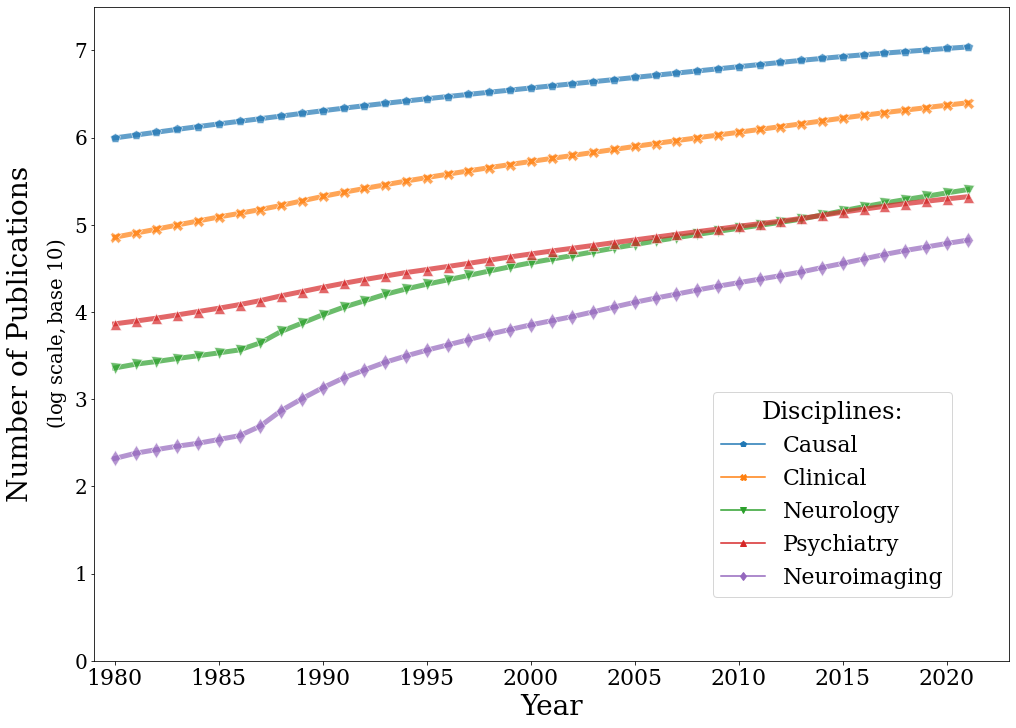

In [2]:
# Making figures
save_fig = 1
figure_size=(14, 10)

X_LIM=[1979, 2023]
Y_LIM=[0, 7.5]
TICK_FONT_SIZE=20
LABEL_FONT_SIZE=28

vis_df=pd.melt(data_df, id_vars = ['Year'], 
               var_name = 'Research Fields', 
               value_vars = col_labels[1:], 
               value_name = 'Number of Publications',
               )

vis_cols = vis_df.columns

f1, ax_lineplot = plt.subplots(figsize=figure_size, facecolor='w', edgecolor='lightgray', constrained_layout=True,) 
ax_lineplot = sns.lineplot(data=vis_df, x=vis_cols[0], y=vis_cols[2], hue=vis_cols[1], style=vis_cols[1],
                           legend='auto', linewidth=5, dashes=False, markers=['p', 'X', 'v', '^', 'd'], markersize=11, alpha=0.7)

plt.xlabel(vis_cols[0], fontsize=LABEL_FONT_SIZE)
plt.ylabel(u'Number of Publications\n$\\regular_{(log\ scale, base\ 10)}$', fontsize=LABEL_FONT_SIZE)
plt.xlim(X_LIM)
plt.ylim(Y_LIM)
for label in ax_lineplot.get_xticklabels():
    label.set_fontsize(TICK_FONT_SIZE+2)
for label in ax_lineplot.get_yticklabels():
    label.set_fontsize(TICK_FONT_SIZE)
plt.legend(loc=4, bbox_to_anchor=(0.95, 0.08), fancybox=True, fontsize=22, title='Disciplines:', title_fontsize=24, )

if save_fig: 
    print('saving...'); 
    f1.savefig(( fig_dir / 'Fig1-causal_trend.jpg'), 
    dpi=330, bbox_inches='tight', pad_inches=0.1);